# AIR QUALITY ANALYSIS and PREDICTION MADRID

###### -Harshul Varma


***

## Table of Contents

[1.0 Introduction](#introduction)<br>
&nbsp;&nbsp;[1.1 Air Pollution and Madrid](#1.1)<br>
&nbsp;&nbsp;[1.2 Air Quality Index](#1.2)<br>
&nbsp;&nbsp;[1.3 Objective](#1.3)<br>
[2.0 Dataset](#dataset)<br>
&nbsp;&nbsp;[2.1 Loading Libraries](#2.1)<br>
&nbsp;&nbsp;[2.2 Loading Data](#2.2)<br>
&nbsp;&nbsp;[2.3 Exploring, Cleaning and Preparing Data](#2.3)<br>
[3.0 Air Purifying Station Analysis ](#airstation)<br>
&nbsp;&nbsp;[3.1 Effect of Altitude on Pollutants in each station](#3.1)<br>
&nbsp;&nbsp;[3.2 Clustering Air Stations (K-Means)](#3.2)<br>
&nbsp;&nbsp;[3.3 Which Cluster has the highest pollution levels](#3.3)<br>
&nbsp;&nbsp;[3.4 Percentage of Pollutants in each Cluster](#3.4)<br>
[4.0 Madrid major pollutant levels 2001-2017 Analysis ](#pollutantlevel)<br>
&nbsp;&nbsp;[4.1 Yearly average of pollutants](#4.1)<br>
&nbsp;&nbsp;[4.2 Monthly average of pollutants](#4.2)<br>
&nbsp;&nbsp;[4.3 Hourly average of pollutants](#4.3)<br>
[5.0 Predicting NO2 values](#predicting)<br>
&nbsp;&nbsp;[5.1 LSTM-RNN Model](#5.1)<br>
&nbsp;&nbsp;[5.2 Evaluation and Predictions Plots](#5.2)<br>
[6.0 Future Changes](#future)<br>

***

## 1.0 Introduction <a id='introduction'></a>

### 1.1 Air Pollution and Madrid <a id="1.1"></a>

Air pollution is an increasing threat to big cities as it directly impacts people's health and even leads to environmental degradation. Many cities and nations have been seen imposing traffic restrictions and policies on smoke emitting factories to combat pollution.

Madrid being of the major metropolitian city in the world has expressed severe concerns and traffic restrictions due to increasing pollutants, mostly NO2, O3 and PM2.5 particles. __[Source-ThomasReuters](https://www.reuters.com/article/us-spain-madrid-cars/madrid-restricts-traffic-in-city-center-to-clean-up-air-pollution-idUSKCN1NZ2AU)__ __[Source-BBC](https://www.bbc.com/news/world-europe-46403397)__
![AirQualityMadrid.jpg](Madrid Air Quality problems.jpg)
__[ImageSource-ElPais](https://elpais.com/elpais/2018/12/05/inenglish/1544008632_514634.html)__

### 1.2 Air Quality Index <a id="1.2"></a>

Air Quality Index (AQI) is a scale used by government to communicate to people how polluted air is or is forecasted to be. The image below shoes the AQI scale and the real time AQI rating of Madrid's various air purifying stations can be viewed __[here.](https://aqicn.org/map/madrid/#@g/40.4086/-3.6411/12z)__

![AQI.jpg](AQI.jpg)

### 1.3 Objective <a id="1.3"></a>
The goal of this notebook is the explore the major air pollutants in Madrid's air throughout 2001-2018 and in each air purifying stations. Furthermore, an LSTM-RNN model is used to predict NO2 levels.

***

## 2.0 Dataset <a id='dataset'></a>

__[This](https://www.kaggle.com/decide-soluciones/air-quality-madrid#madrid.h5)__ dataset is used for the exploratory analysis of Air Quality in Madrid. The data consists of two different datasets.
1. Stations: Consists of station id, address, names, longitude and latitude information
2. Madrid Air 2001-2018: Consists of 18 years of data for madrid's air including date, station id and amount of pollutants per hour masured in μg/m3 (Micrograms per Cubic Meter of Air). Not every station has the same equipment, therefore each station can measure only a certain subset of particles.

### 2.1 Loading Libraries <a id="2.1"></a>

We will utilise numpy, pandas to manipulate data; seaborn, matplotlib and folium to visulaise data, missingno to detect missing data and finally Tensorflow to build a predictive model.

In [13]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn import metrics

from datetime import datetime

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

from geopy.geocoders import Nominatim
import missingno as msno
import folium


import statsmodels.api as sm

import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
matplotlib.rcParams['axes.labelsize'] = 16
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
plt.style.use('fivethirtyeight')

### 2.2 Loading Data <a id="2.2"></a>

We can now load Madrid's air data from 2000-2018. Since we have 18 different dataset for that, I concatenated it into one big dataset and named it "df". This dataframe can now be used to explore the dataset.

Firstly, let's see what the columns look like.

In [14]:
madrid_air_2001 = pd.read_csv('Madird air quality/csvs_per_year/madrid_2001.csv')
madrid_air_2002 = pd.read_csv('Madird air quality/csvs_per_year/madrid_2002.csv')
madrid_air_2003 = pd.read_csv('Madird air quality/csvs_per_year/madrid_2003.csv')
madrid_air_2004 = pd.read_csv('Madird air quality/csvs_per_year/madrid_2004.csv')
madrid_air_2005 = pd.read_csv('Madird air quality/csvs_per_year/madrid_2005.csv')
madrid_air_2006 = pd.read_csv('Madird air quality/csvs_per_year/madrid_2006.csv')
madrid_air_2007 = pd.read_csv('Madird air quality/csvs_per_year/madrid_2007.csv')
madrid_air_2008 = pd.read_csv('Madird air quality/csvs_per_year/madrid_2008.csv')
madrid_air_2009 = pd.read_csv('Madird air quality/csvs_per_year/madrid_2009.csv')
madrid_air_2010 = pd.read_csv('Madird air quality/csvs_per_year/madrid_2010.csv')
madrid_air_2011 = pd.read_csv('Madird air quality/csvs_per_year/madrid_2011.csv')
madrid_air_2012 = pd.read_csv('Madird air quality/csvs_per_year/madrid_2012.csv')
madrid_air_2013 = pd.read_csv('Madird air quality/csvs_per_year/madrid_2013.csv')
madrid_air_2014 = pd.read_csv('Madird air quality/csvs_per_year/madrid_2014.csv')
madrid_air_2015 = pd.read_csv('Madird air quality/csvs_per_year/madrid_2015.csv')
madrid_air_2016 = pd.read_csv('Madird air quality/csvs_per_year/madrid_2016.csv')
madrid_air_2017 = pd.read_csv('Madird air quality/csvs_per_year/madrid_2017.csv')
madrid_air_2018 = pd.read_csv('Madird air quality/csvs_per_year/madrid_2018.csv')

In [15]:
madrid_air =  [madrid_air_2001, madrid_air_2002, madrid_air_2003, madrid_air_2004, madrid_air_2005, madrid_air_2006, madrid_air_2007, madrid_air_2008, madrid_air_2009, madrid_air_2010, madrid_air_2011, madrid_air_2012, madrid_air_2013, madrid_air_2014, madrid_air_2015, madrid_air_2016, madrid_air_2017, madrid_air_2018,]
df = pd.concat(madrid_air,sort='False')
df.head()

,BEN,CH4,CO,EBE,MXY,NMHC,NO,NO_2,NOx,OXY,O_3,PM10,PM25,PXY,SO_2,TCH,TOL,date,station
0,NaN,NaN,0.37,NaN,NaN,NaN,NaN,58.400002,87.150002,NaN,34.529999,105.000000,NaN,NaN,6.34,NaN,NaN,2001-08-01 01:00:00,28079001
1,1.5,NaN,0.34,1.49,4.1,0.07,NaN,56.250000,75.169998,2.11,42.160000,100.599998,NaN,1.73,8.11,1.24,10.82,2001-08-01 01:00:00,28079035
2,NaN,NaN,0.28,NaN,NaN,NaN,NaN,50.660000,61.380001,NaN,46.310001,100.099998,NaN,NaN,7.85,NaN,NaN,2001-08-01 01:00:00,28079003
3,NaN,NaN,0.47,NaN,NaN,NaN,NaN,69.790001,73.449997,NaN,40.650002,69.779999,NaN,NaN,6.46,NaN,NaN,2001-08-01 01:00:00,28079004
4,NaN,NaN,0.39,NaN,NaN,NaN,NaN,22.830000,24.799999,NaN,66.309998,75.180000,NaN,NaN,8.80,NaN,NaN,2001-08-01 01:00:00,28079039


The dataframe consists of 17 pollutants. Since we are mainly concerened with major air pollutants that are dangerous to humans and environment, we will keep the following pollutants:

1) Carbon Monoxide - CO reduces oxygen in the blood stream, when it enters the body through the lungs. The danger of this pollutant increases in people who suffer cardiovascular diseases such as angina.

2) Nitrous Dioxide -  it has a direct effect on health, as short-term exposure reduces lung function while long term exposure is linked to increased risk of respiratory infection in children. NOx levels in urban areas are influenced by weather episodes, which accounts for some of the variation seen in annual results.

3) Ozone - exposure to this can irritate breathing, decrease lung function, inflame airways and worsen lung conditions such as asthma. It can also affect crops and other vegetation and even buildings. 

4) Sulphur Dioxide - high concentrations can result in breathing impairment for asthmatics who are active outdoors. As can be seen from the graph below, levels have been consistently low in Ireland since 2002, with a slight downward trend. This trend is reflective in the shift in fuel choice across Ireland in both the residential heating sector and the energy production sector. This shift has been from sulphur containing bituminous coal to those fuels which are low in SO2 production, such as natural gas (EPA, 2013).

5) PM10 particles and PM2.5 particles - These particulates are so small that they get deep into your respiratory tract and increase the risk of disorders.

__[Source](http://www.askaboutireland.ie/enfo/irelands-environment/air-quality/which-pollutants-are-dang/)__



In [16]:
df.date = pd.to_datetime(df.date)
df = df.drop(['BEN','CH4','EBE','MXY','NMHC','NO','NOx','OXY','PXY','TCH','TOL'],axis=1)

In [17]:
# df.to_csv('MadirdAirQuality/pollutants.csv')

Let us now look at Madrid's air stations and where they are located.

In [18]:
stations = pd.read_csv("Madird air quality/stations.csv")
# stations.to_csv('C:/Users/harsh/Desktop/MadridAirQuality/stations.csv')
stations

,id,name,address,lon,lat,elevation
0,28079004,Pza. de España,Plaza de España,-3.712247,40.423853,635
1,28079008,Escuelas Aguirre,Entre C/ Alcalá y C/ O’ Donell,-3.682319,40.421564,670
2,28079011,Avda. Ramón y Cajal,Avda. Ramón y Cajal esq. C/ Príncipe de Vergara,-3.677356,40.451475,708
3,28079016,Arturo Soria,C/ Arturo Soria esq. C/ Vizconde de los Asilos,-3.639233,40.440047,693
4,28079017,Villaverde,C/. Juan Peñalver,-3.713322,40.347139,604
5,28079018,Farolillo,Calle Farolillo - C/Ervigio,-3.731853,40.394781,630
6,28079024,Casa de Campo,Casa de Campo (Terminal del Teleférico),-3.747347,40.419356,642
7,28079027,Barajas Pueblo,"C/. Júpiter, 21 (Barajas)",-3.580031,40.476928,621
8,28079035,Pza. del Carmen,Plaza del Carmen esq. Tres Cruces.,-3.703172,40.419208,659
9,28079036,Moratalaz,Avd. Moratalaz esq. Camino de los Vinateros,-3.645306,40.407947,685


### 2.3 Exploring, Cleaning and Preparing Data <a id="2.3"></a>

In [19]:
#Obtaining Madrid's latitude and longitude
address = 'Madrid'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Madrid are {}, {}.'.format(latitude, longitude))

# create map of Madrid using latitude and longitude values
stations_map = folium.Map(location=[latitude, longitude], zoom_start=11)

# add stations markers to map
for lat, lng, name in zip(stations['lat'], stations['lon'], stations['name']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_opacity=0.7,
        parse_html=False).add_to(stations_map)  
    
stations_map


The geograpical coordinate of Madrid are 40.4167047, -3.7035825.


Further, I used missigno to form a matrix for the available data. As we can see below, the dataframe has a lot of missing values. We can interpolate the data to fix this.

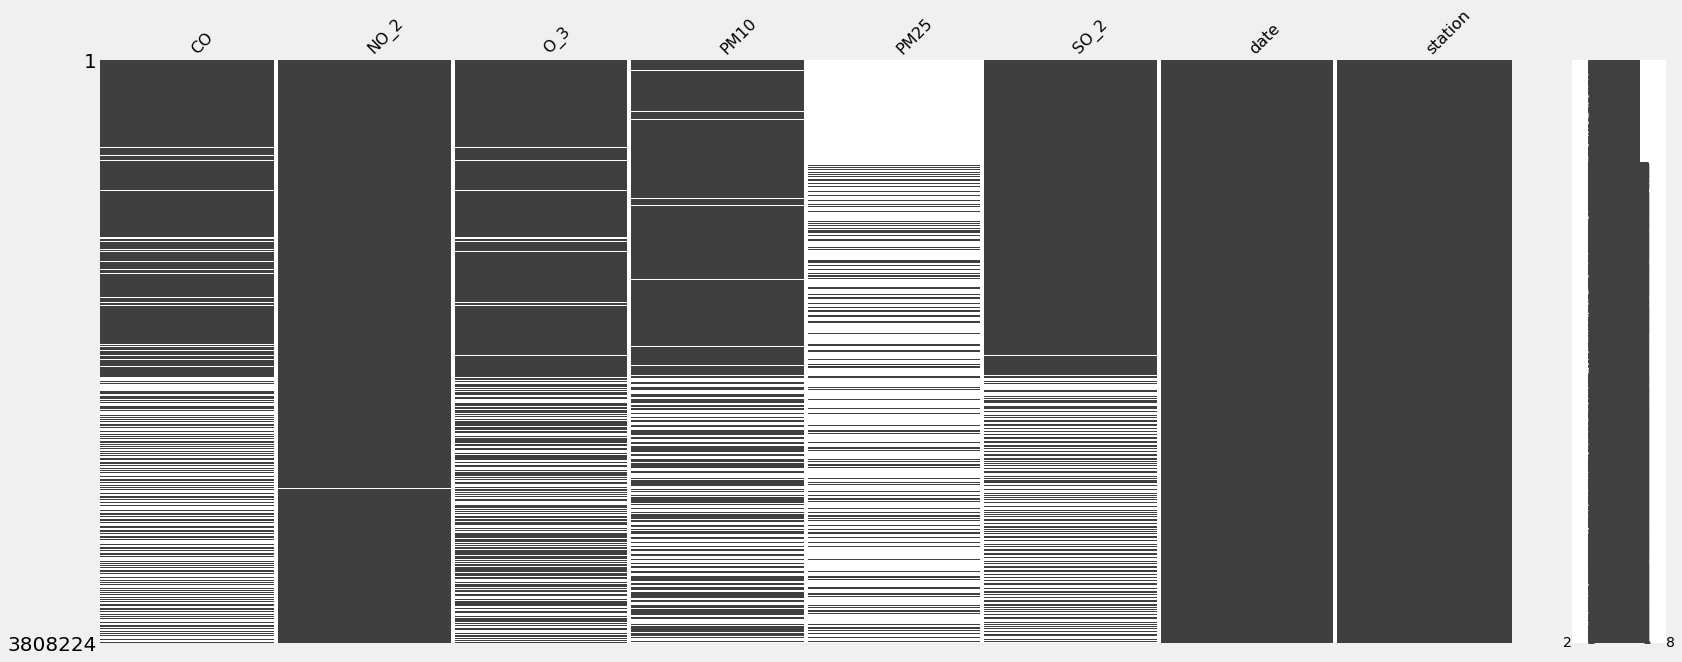

In [20]:
msno.matrix(df)

In [21]:
df = df.set_index('date')
df = df.interpolate(method='time').reset_index()

***

## 3.0 Air Purifiying Station Analysis <a id='airstation'></a>

The goal of this section will be to cluster air station together to see which stations have similiar air pollutant levels.
In order to do that, since we need to merge the two datasets.

In [22]:
#Creating new dataframe that consists of the mean values of each pollutant for each station
df_stations = df.drop(columns = 'date')
df_stations = df_stations.groupby(['station']).mean().reset_index()
#Merging dataframes
df_stations = pd.merge(stations,df_stations,how='left',left_on='id',right_on='station')
df_stations = df_stations.drop(columns='station')
#Looking at the new dataframe
df_stations.head()

,id,name,address,lon,lat,elevation,CO,NO_2,O_3,PM10,PM25,SO_2
0,28079004,Pza. de España,Plaza de España,-3.712247,40.423853,635,0.515370,54.014636,40.148969,25.609454,13.606227,9.430368
1,28079008,Escuelas Aguirre,Entre C/ Alcalá y C/ O’ Donell,-3.682319,40.421564,670,0.505302,61.895125,35.344949,28.333463,14.512723,10.879277
2,28079011,Avda. Ramón y Cajal,Avda. Ramón y Cajal esq. C/ Príncipe de Vergara,-3.677356,40.451475,708,0.452598,50.088827,42.323938,25.128558,13.608611,10.448298
3,28079016,Arturo Soria,C/ Arturo Soria esq. C/ Vizconde de los Asilos,-3.639233,40.440047,693,0.385001,42.869485,44.523252,24.120889,13.603646,8.401258
4,28079017,Villaverde,C/. Juan Peñalver,-3.713322,40.347139,604,0.484098,45.898567,39.701443,27.532213,12.500805,7.307182


### 3.1 Effect of Altitude on Pollutants in each station <a id="3.1"></a>

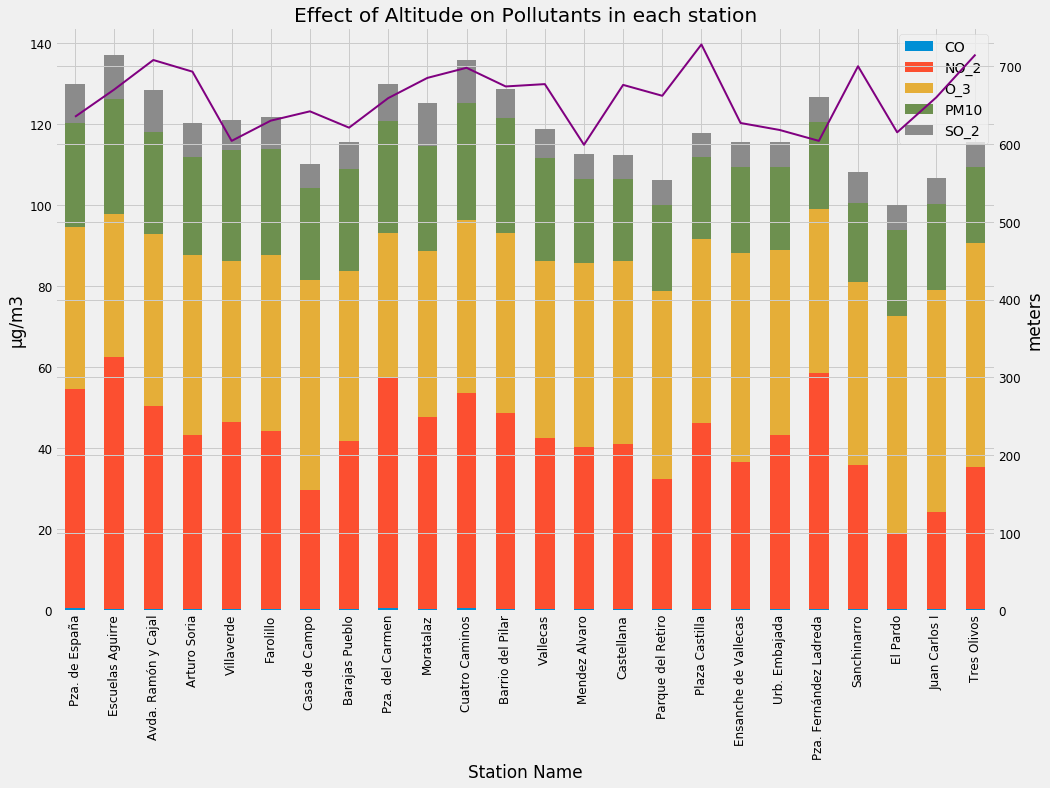

In [23]:

#dropping columns we don't need
df_stationsmean = df_stations.drop(columns=['id','address','lon','lat']).set_index('name')

#plotting pollutants for each station
ax1 = df_stationsmean[['CO','NO_2','O_3','PM10','SO_2']].plot(kind='bar',stacked=True, title = 'Effect of Altitude on Pollutants in each station',figsize =(15,10))
ax1.set_xlabel("Station Name")
ax1.set_ylabel("μg/m3")

#plotting altitude for each station
ax2 = ax1.twinx()
ax2 = df_stationsmean['elevation'].plot(secondary_y=True,color='purple',linewidth=2)
ax2.set_ylabel("meters")
ax2.set_ylim(0,750)

plt.show()

###### As we can see, altitude does not have any impact on the total pollutants in each station. This might be because the altitude does not vary too much in the region to show significant differences.

###### It can also be observed that Esculelas Aguirre has the highest mean pollutant levels throughout the 17 years

### 3.2 Clustering Air Stations (K-Means) <a id="3.2"></a>

We will use K means to cluster the air stations based on their pollutant levels. The data will first be normalized, then the most optimal K will be observed and clusters will be formed and analysed.

In [24]:
#storing pollutant levels in a dataframe
x_df = df_stations.drop(columns=['id','name','address','lon','lat','elevation'])
#creating a numpy array for the values
x = x_df.values 
#Normalizing values
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
#storing normalized values in a dataframe
df_stations_normalized = pd.DataFrame(x_scaled)
#replacing any NaN values with 0
df_stations_normalized=df_stations_normalized.fillna(value=0)

maximum is 0.5582591991873208, which occurs at k=2


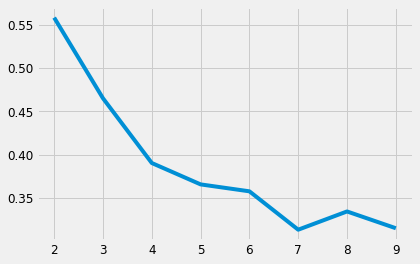

In [25]:
#Checking for the best K value
START = 2
END = 10
scores = []
for k in range(START, END):
    # run k-means clustering for 2-10 k values
    kmeans = KMeans(n_clusters=k, random_state=0).fit(df_stations_normalized)
    
    scores.append(metrics.silhouette_score(df_stations_normalized, kmeans.labels_))   
print( "maximum is {}, which occurs at k={}".format(np.max(scores),np.argmax(scores)+START))
kclusters=np.argmax(scores)+START
plt.plot(range(START,END),scores)

In [26]:
#using k=3
kclusters = 3
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_stations_normalized)
# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:] 

array([1, 1, 1, 2, 2, 2, 0, 2, 1, 1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [27]:
# add clustering labels
df_stations.insert(0, 'Cluster Labels', kmeans.labels_)
# df_stations.to_csv('C:/Users/harsh/Desktop/MadridAirQuality/station_cluster.csv')

In [28]:
# create map to visualise clusters
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, name,cluster in zip(df_stations['lat'], df_stations['lon'], df_stations['name'], df_stations['Cluster Labels']):
    label = folium.Popup(' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [29]:
#dataframe with aggregated stations
clusters1 = df_stations.groupby(['Cluster Labels'], as_index=False, sort=False).agg(','.join)
clusters1 = clusters1.drop(columns=['address'])
#dataframe with mean value of all pollutants
clusters2 = df_stations.groupby(['Cluster Labels'], as_index=False, sort=False).mean()
clusters2 = clusters2.drop(columns=['id','lon','lat','elevation'])
#merging the two dataframes
clusters = pd.merge(clusters1,clusters2,on='Cluster Labels')
clusters = clusters.sort_values(by='Cluster Labels')
#Renaming the cluster columns
clusters.columns = ['Cluster Lables','Stations in Cluster','Mean CO','Mean NO_2','Mean O_3','Mean PM10','Mean PM25','Mean SO_2']

pd.options.display.max_colwidth = 1000
display(clusters)

,Cluster Lables,Stations in Cluster,Mean CO,Mean NO_2,Mean O_3,Mean PM10,Mean PM25,Mean SO_2
2,0,"Casa de Campo,Mendez Alvaro,Castellana,Parque del Retiro,Plaza Castilla,Ensanche de Vallecas,Urb. Embajada,Pza. Fernández Ladreda,Sanchinarro,El Pardo,Juan Carlos I,Tres Olivos",0.357818,36.532492,48.395102,20.703306,10.827362,6.236565
0,1,"Pza. de España,Escuelas Aguirre,Avda. Ramón y Cajal,Pza. del Carmen,Moratalaz,Cuatro Caminos",0.499898,53.862563,39.532205,26.892447,13.784023,10.171521
1,2,"Arturo Soria,Villaverde,Farolillo,Barajas Pueblo,Barrio del Pilar,Vallecas",0.455624,43.996466,43.002311,26.094732,13.404085,7.468390


### 3.3 Which Cluster has the highest Pollution levels? <a id="3.3"></a>

Text(0.5, 0, 'μg/m3')

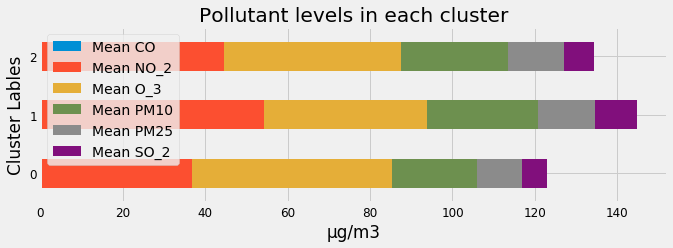

In [30]:
df_clusters_plot = clusters.drop(columns=['Stations in Cluster']).set_index('Cluster Lables')
ax = df_clusters_plot.plot(kind='barh', stacked=True, title = 'Pollutant levels in each cluster',figsize =(10,3))
ax.set_ylabel("Cluster Lables")
ax.set_xlabel("μg/m3")

###### Cluster 0 has the most Total mean pollutant level 

### 3.4 Percentage of Pollutants in each Cluster <a id="3.4"></a>

In [31]:
#dataframe to calculate percentage pollutants in each cluster
df_cluster_percentage = clusters.drop(columns=['Stations in Cluster']).set_index('Cluster Lables')
df_cluster_percentage['Total'] = df_cluster_percentage.sum(axis=1)
df_cluster_percentage = df_cluster_percentage.div(df_cluster_percentage['Total'],axis=0)
df_cluster_percentage = df_cluster_percentage*100
df_cluster_percentage = df_cluster_percentage.drop(columns=['Total'])
#TRanspose the dataframe to create donut charts
df_cluster_percentage_transpose = df_cluster_percentage.T
df_cluster_percentage_transpose.columns = ['cluster 0','cluster 1','cluster 2']

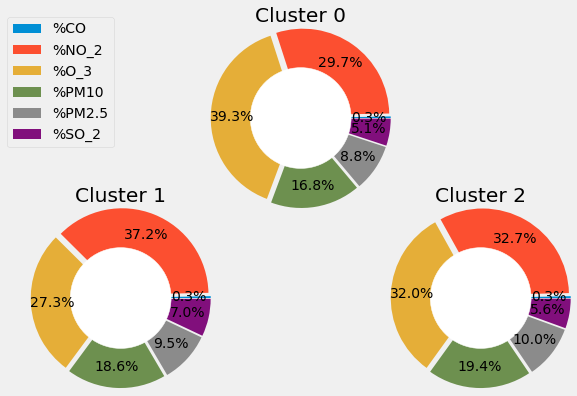

In [32]:
explode = (0.05,0.05,0.05,0.05,0.05,0.05)

fig = plt.figure(figsize=(5,2.5))

ax1 = fig.add_axes([0.5, 0, 1, 1], aspect=1)
ax1.pie(df_cluster_percentage_transpose['cluster 0'],autopct='%1.1f%%',pctdistance=0.75,explode=explode,radius=1.2,rotatelabels=True)
ax1.set_title('Cluster 0')
my_circle1=plt.Circle( (0,0), 0.7, color='white')
p1=plt.gcf()
p1.gca().add_artist(my_circle1)

ax2 = fig.add_axes([0, -1, 1, 1], aspect=1)
ax2.pie(df_cluster_percentage_transpose['cluster 1'],autopct='%1.1f%%',pctdistance=0.75,explode=explode,radius=1.2,rotatelabels=True)
ax2.set_title('Cluster 1')
my_circle2=plt.Circle( (0,0), 0.7, color='white')
p2=plt.gcf()
p2.gca().add_artist(my_circle2)

ax3 = fig.add_axes([1, -1, 1, 1], aspect=1)
ax3.pie(df_cluster_percentage_transpose['cluster 2'],autopct='%1.1f%%',pctdistance=0.75,explode=explode,radius=1.2,rotatelabels=True)
ax3.set_title('Cluster 2')
my_circle3=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle3)

labels = ('%CO','%NO_2','%O_3','%PM10','%PM2.5','%SO_2')
ax1.legend(labels,bbox_to_anchor=(0.5,0.7),loc='right',bbox_transform=plt.gcf().transFigure)

###### We can observe that although Cluster 0 had the most total amount of polluntants, Cluster 1 has the more Percentage of NO2 content and Cluster 2 has the most Ozone out of the total pollutants in respective cluster

***

## 4.0 Madrid major pollutant levels 2001-2017 Analysis <a id='pollutantlevel'></a>

### 4.1 Yearly average of pollutants <a id="4.1"></a>

In [33]:
#Dropping station name columns since we don't require it for this section
df = df.drop(columns='station')

Text(0.04, 0.5, 'μg/m3')

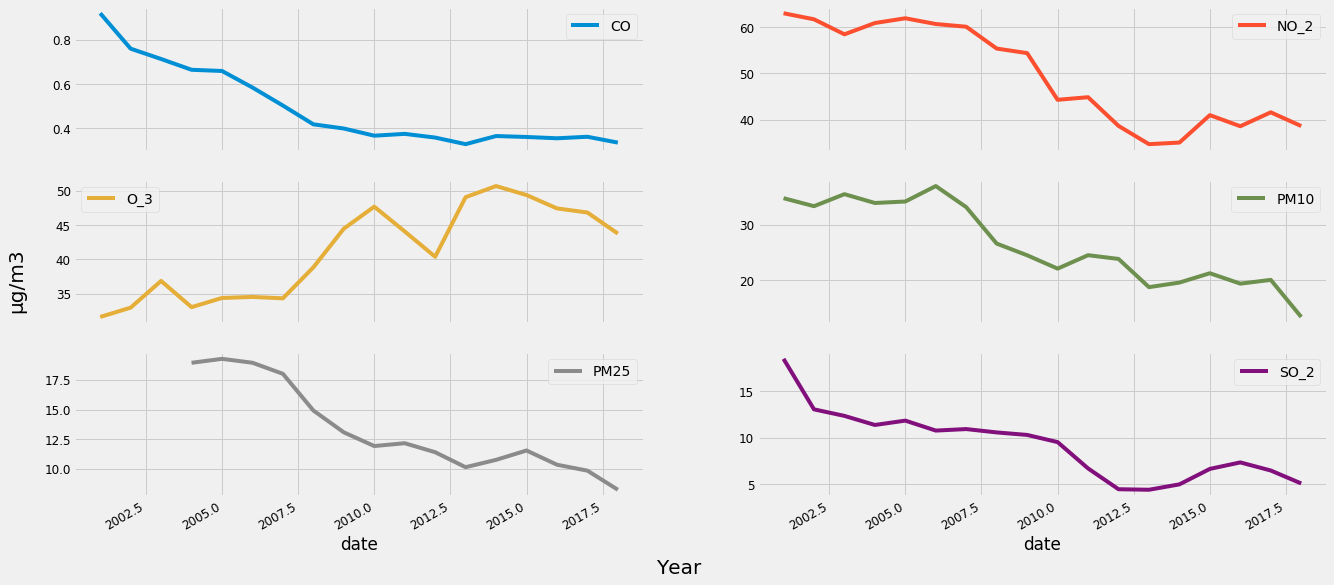

In [34]:
#creating yearly average dataframe and plotting it
yr = df.groupby(df['date'].dt.year).mean()
ax = yr.plot(subplots=True,layout=(3,2),figsize =(20,10),sharex=True)
fig=ax[0,0].figure
fig.text(0.5,0.1, 'Year', ha="center", va="center",size=20)
fig.text(0.04,0.5, 'μg/m3', ha="center", va="center", rotation=90,size=20)

### 4.2 Monthly average of pollutants <a id="4.2"></a>

Text(0.04, 0.5, 'μg/m3')

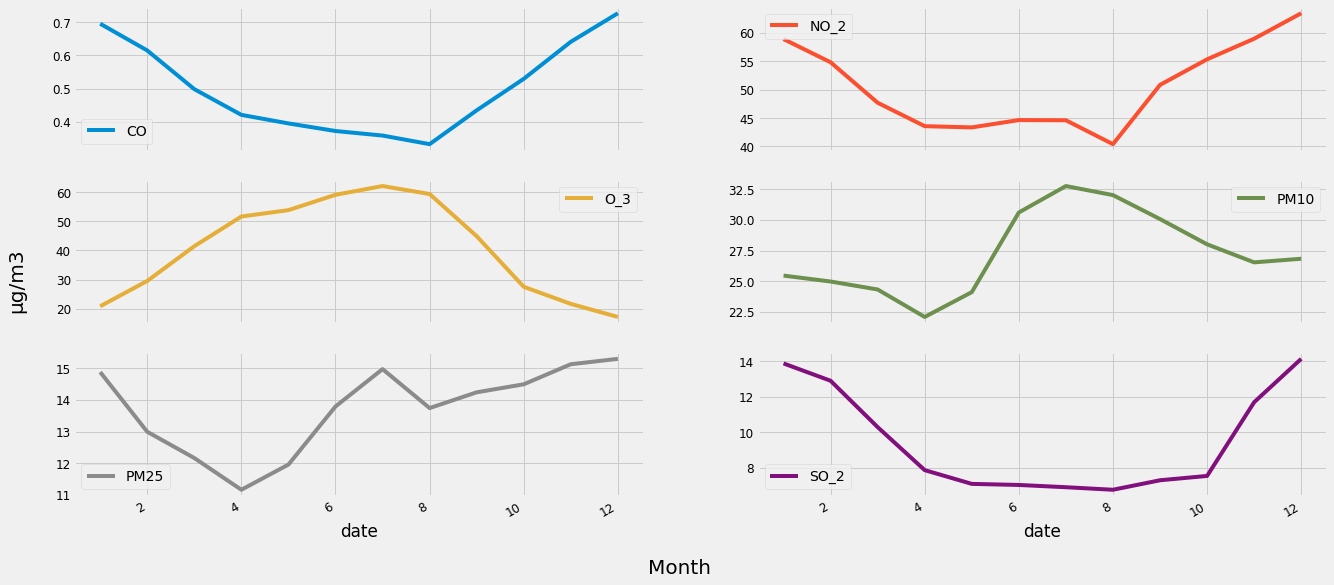

In [35]:
#creating yearly average dataframe and plotting it
mt = df.groupby(df['date'].dt.month).mean()
ax = mt.plot(subplots=True,layout=(3,2),figsize =(20,10),sharex=True)
fig=ax[0,0].figure
fig.text(0.5,0.1, 'Month', ha="center", va="center",size=20)
fig.text(0.04,0.5, 'μg/m3', ha="center", va="center", rotation=90,size=20)

It can be observed that there is a rise in Ozone during the summer months, while other pollutants tend to rise during the winter months. This is in line with studies that show that the reactions that create ozone are catalysed by heat and sunlight. Particulate Matters tend to rise during the summer months as well, that maybe because of more vehicles on the road during the summer months

### 4.3 Hourly average of pollutants <a id="4.3"></a>

Text(0.04, 0.5, 'μg/m3')

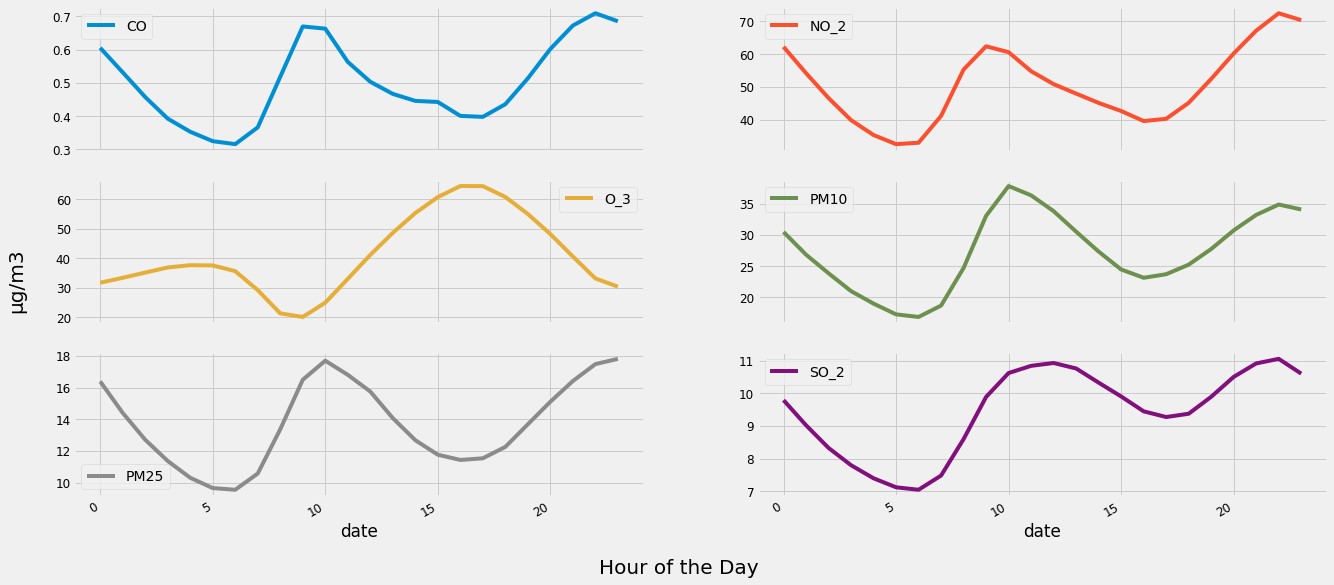

In [36]:
hour = df.groupby(df['date'].dt.hour).mean()
ax = hour.plot(subplots=True,layout=(3,2),figsize =(20,10),sharex=True)
fig=ax[0,0].figure
fig.text(0.5,0.1, 'Hour of the Day', ha="center", va="center",size=20)
fig.text(0.04,0.5, 'μg/m3', ha="center", va="center", rotation=90,size=20)

Nitrous Dioxide and PM10 particles seem to be high during early morning and late night. While Ozone amount rises around 1600 hours. A general trend that can be noticed is pollution levels rise after noon and progress to higher amounts by the end of the day.

***

## 5.0 Predicting NO2 values <a id='predicting'></a>

### 5.1 LSTM-RNN Model <a id="5.1"></a>

We will now build an Recurrent Neural Network with Long Short Term Memory to predict the Nitrous Di Oxide levels. NO2 is chosen because it as seen in the Dataset section, we have the least missing data for NO2 and thus will lead to a more accurate model.

In [100]:
#Creating a dataframe with only NO2 values
df1 = df.drop(columns=['CO','O_3','PM10','PM25','SO_2'])
df1 = df1.set_index('date')
#Grouping by hour of each day and finding mean values
df1 = df1.groupby(pd.Grouper(freq='H')).mean()
df1['date'] = pd.to_datetime(df1.index)

All the data avaialable before 2014 will be used as the training set while the data after 2014 will be used as the test set.

In [38]:
#Creating Test Train splits
train = df1[df1['date'].dt.year < 2014]
test = df1[(df1['date'].dt.year >= 2014)]
train = train.drop(['date'],axis=1)
test = test.drop(['date'],axis=1)

The values are then normalized.

In [39]:
scaler = MinMaxScaler()
train = scaler.fit_transform(train)
test = scaler.transform(test)

Now we need to make a function to create sliding windows which will use 'n_steps' as the number of steps the window will use to create a feature set X and the nth value in the data will be the target value.

In [40]:
#Creating a function to make feature and target set
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [41]:
#Feature and Target sets
x_train,y_train = split_sequences(train,10)
x_test,y_test = split_sequences(test,10)

In [42]:
#Defining n_seps and n_features to use as input shape for the LSTM model
n_steps = x_train.shape[1]
n_features = x_train.shape[2]

In [43]:
#creating LSTM-RNN model
model = Sequential()
model.add(LSTM(5,input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
history = model.fit(x_train, y_train,validation_data=(x_test,y_test), epochs = 10)

Train on 113941 samples, validate on 37935 samples
Epoch 1/10
113941/113941 [==============================] - 22s 190us/step - loss: 0.0027 - val_loss: 6.4156e-04
Epoch 2/10
113941/113941 [==============================] - 22s 190us/step - loss: 7.1066e-04 - val_loss: 6.1212e-04
Epoch 3/10
113941/113941 [==============================] - 23s 202us/step - loss: 7.0405e-04 - val_loss: 5.8804e-04
Epoch 4/10
113941/113941 [==============================] - 22s 193us/step - loss: 6.9931e-04 - val_loss: 5.8700e-04
Epoch 5/10
113941/113941 [==============================] - 23s 201us/step - loss: 6.9330e-04 - val_loss: 5.7528e-04
Epoch 6/10
113941/113941 [==============================] - 22s 193us/step - loss: 6.9260e-04 - val_loss: 5.7391e-04
Epoch 7/10
113941/113941 [==============================] - 22s 196us/step - loss: 6.8764e-04 - val_loss: 5.7474e-04
Epoch 8/10
113941/113941 [==============================] - 23s 199us/step - loss: 6.8688e-04 - val_loss: 5.8243e-04
Epoch 9/10
113941

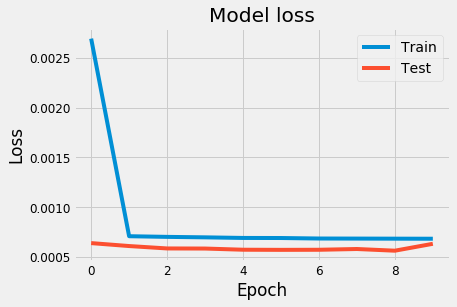

In [44]:
#Looking at the losses
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

### 5.2 Evaluation and Predictions plots <a id="5.2"></a>

Using the model to generate predicitions.

In [45]:
#getting predictions
predictions = model.predict(x_test)

In [46]:
#inverse transform of scaler of predictions and y_test
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)

In [49]:
#defining metrics for evaluation
def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

def rmse(A,F):
    return np.sqrt(np.mean((F-A)**2))

In [50]:
print('SMAPE: ', smape(y_test,predictions))
print('RMSE: ', rmse(y_test,predictions))

SMAPE:  16.152500180163585
RMSE:  7.1698367525727305


Creating a dataframe with both real values and predictions

In [101]:
#constructing dataframe of real and predicted values
realval = pd.DataFrame(y_test)
realval['date'] = pd.date_range(start = "2014-01-01",periods=len(realval),freq = 'H')
realval.columns = ['actual NO_2','date']
preds = pd.DataFrame(predictions)
preds['date'] = pd.date_range(start = "2014-01-01",periods=len(preds),freq = 'H')
preds.columns = ['predicted NO_2','date']
merged = pd.merge(realval,preds,on='date')

Looking at how the predictions and real values look for the test set.

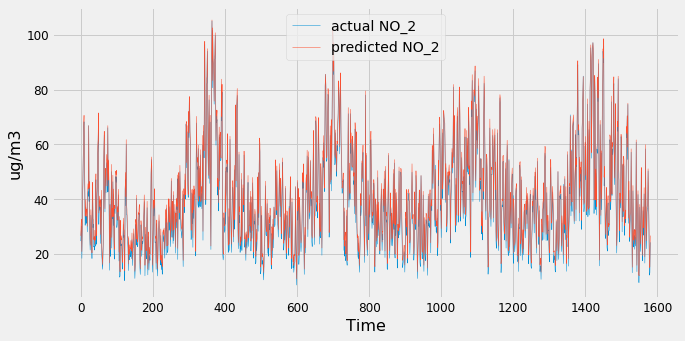

In [102]:
date = merged.groupby(merged['date'].dt.date).mean().reset_index()
ax = date.plot(kind = 'line',figsize =(10,5))
ax.set_xlabel("Time")
ax.set_ylabel("ug/m3")
matplotlib.rcParams['axes.labelsize'] = 16
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
matplotlib.rcParams['lines.linewidth']=0.5

The predictions generated through the LSTM-RNN model seems to fit almost perfectly with the real values but it can be improved a bit to capture the peaks better. For the sake of the scope of this project, this is perfectly acceptable!

Finally we can look at the monthly average of our predicted values plotted along with the real values.

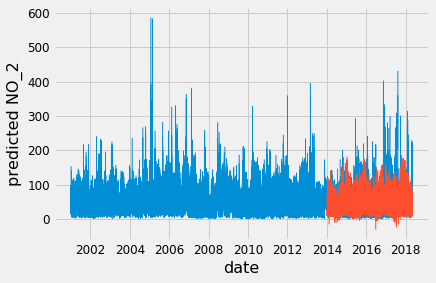

In [103]:
df1 = df1.reset_index(drop=True)
df1 = df1.groupby(df1['date']).mean().reset_index()
merged = merged.groupby(merged['date']).mean().reset_index()
sns.lineplot(df1['date'],df['NO_2'])
sns.lineplot(merged['date'],merged['predicted NO_2'])

***

## 6.0 Future Changes <a id='future'></a>

Some of the future changes I would like to implement to create a robust model for prediction and to generate better insights are:

1) Use Madrid's traffic and weather datasets along with the amount of air pollutants in order to construct a more robust model in forecasting pollution. Since traffic and weather play a major role in the amounts of pollutants.

2) Use ARIMA algorithm to predict weather and compare it to LSTM-RNN

3) Better Data Preparatioin - remove outliers and interpolate the data better

***